<a href="https://colab.research.google.com/github/LilianCMartins/Challenge-Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
### Cálculo do faturamento total por loja

faturamento_loja = sum(loja['Preço'])
faturamento_loja2 = sum(loja2['Preço'])
faturamento_loja3 = sum(loja3['Preço'])
faturamento_loja4 = sum(loja4['Preço'])

print(f"Faturamento da Loja : R${faturamento_loja:,.2f}")
print(f"Faturamento da Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento da Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento da Loja 4: R${faturamento_loja4:,.2f}")

## Faturamento Total

faturamento_total = faturamento_loja + faturamento_loja2 + faturamento_loja3 +faturamento_loja4
print(f"Faturamento Total: R${faturamento_total:,.2f}")

Faturamento da Loja : R$1,534,509.12
Faturamento da Loja 2: R$1,488,459.06
Faturamento da Loja 3: R$1,464,025.03
Faturamento da Loja 4: R$1,384,497.58
Faturamento Total: R$5,871,490.79


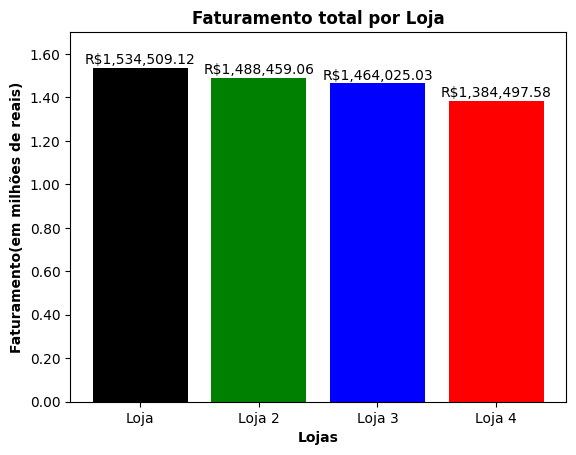

In [11]:
#Criando um gráfico para comparar os valores de faturamento das lojas

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

faturamento  = [faturamento_loja,faturamento_loja2,faturamento_loja3,faturamento_loja4]
lojas = ['Loja','Loja 2','Loja 3','Loja 4']

plt.bar(lojas,faturamento, color = ['black','green','blue','red'])
plt.title('Faturamento total por Loja',fontweight='bold')
plt.xlabel('Lojas',fontweight='bold')
plt.ylabel('Faturamento(em milhões de reais)',fontweight='bold')

# Ajustando os limites do eixo Y
plt.ylim(0,1700000)



# Aplicando o formatador ao eixo Y
def formatar_milhoes(x, pos):
    return f'{x/1e6:,.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhoes))

# Adicionando os valores acima das barras
for i, v in enumerate(faturamento):
    plt.text(i, v + 5000, f'R${v:,.2f}', ha='center', va='bottom')

# Exibindo o gráfico
plt.show()



# 2. Vendas por Categoria


     Loja   Categoria do Produto  Quantidade Vendida
0  Loja 1             brinquedos                 324
1  Loja 1       eletrodomesticos                 312
2  Loja 1            eletronicos                 448
3  Loja 1        esporte e lazer                 284
4  Loja 1  instrumentos musicais                 182


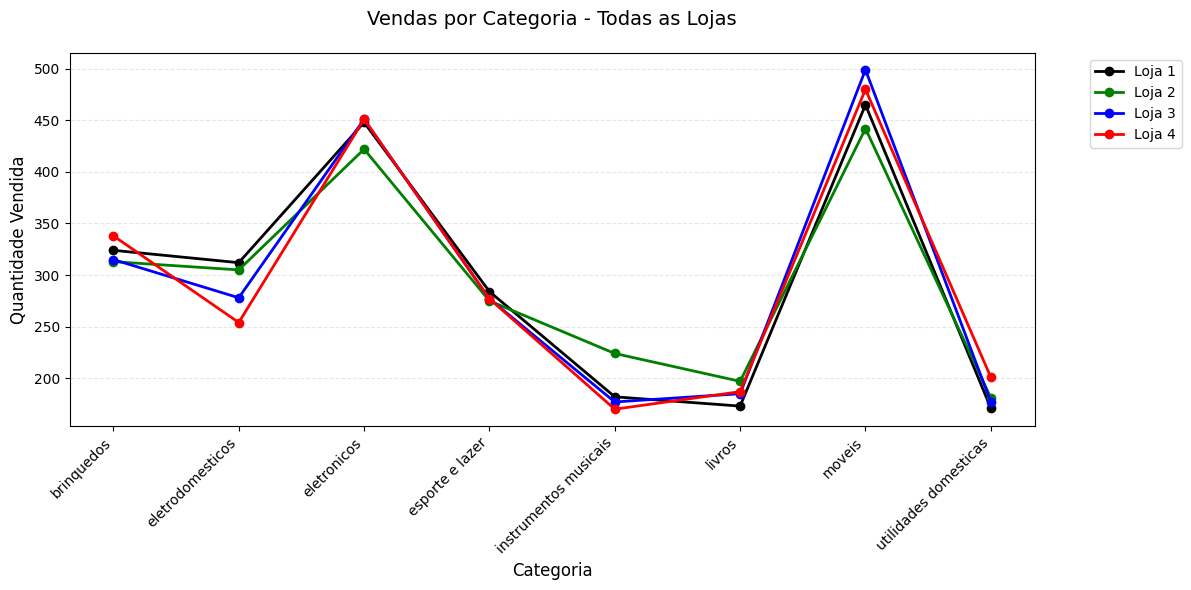

In [9]:

# Adicionando a coluna loja em cada Data Frame

loja ['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Junta todas as lojas em um único DataFrame
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


#Agrupar por quantidade

# Agrupando por Loja e Categoria do Produto e contando a quantidade de vendas
quantidade_por_categoria = todas_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade Vendida')


# Exibindo o resultado
print(quantidade_por_categoria.head())

#Gráfico
# Definir cores diferentes para cada loja
cores = ['black', 'green', 'blue', 'red', '#FFEEAD', '#D4A5A5']

# Criar uma única figura
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotar cada loja com uma cor diferente
for loja_nome in quantidade_por_categoria['Loja'].unique():
    dados_loja = quantidade_por_categoria[quantidade_por_categoria['Loja'] == loja_nome]

    # Plotar a linha com a cor correspondente
    plt.plot(dados_loja['Categoria do Produto'],
            dados_loja['Quantidade Vendida'],
            marker='o',
            linewidth=2,
            label=loja_nome,
            color=cores[list(quantidade_por_categoria['Loja'].unique()).index(loja_nome)])

# Configurar o gráfico
plt.title('Vendas por Categoria - Todas as Lojas', fontsize=14, pad=20)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

*   Item de lista
*   Item de lista



In [13]:
# Média das avaliação da loja
media_avaliacao_loja = todas_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacao_loja.columns = ['Loja','Média de Avaliação']
media_avaliacao_loja



,Loja,Média de Avaliação
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


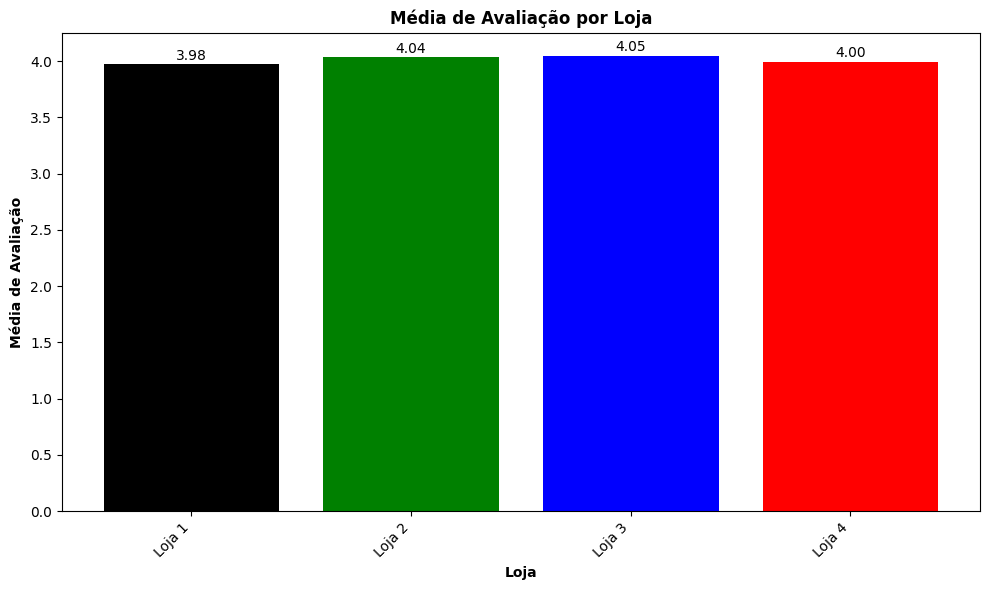

In [14]:
#Gráfico

plt.figure(figsize=(10,6))
plt.bar(media_avaliacao_loja['Loja'],media_avaliacao_loja['Média de Avaliação'], color = ['black','green','blue','red'])
plt.title('Média de Avaliação por Loja',fontweight = 'bold')
plt.xlabel('Loja',fontweight = 'bold')
plt.ylabel('Média de Avaliação',fontweight = 'bold')

plt.xticks(rotation=45, ha = 'right')

# Adicionando os valores acima das barras
for i, v in enumerate(media_avaliacao_loja['Média de Avaliação']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

## 4. Produtos Mais e Menos Vendidos




In [40]:
#Agrupar por loja e produto, contando as ocorrências
quantidade_por_produto_loja = todas_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')

# Ordenar os dados por loja e quantidade vendida
quantidade_por_produto_loja = quantidade_por_produto_loja.sort_values(by=['Loja', 'Quantidade Vendida'], ascending=[True, False])

produto_mais_vendido_loja = quantidade_por_produto_loja.groupby('Loja').head(1)

print("Produtos mais vendidos por Loja: ")
print(quantidade_por_produto_loja.head(10))

produto_menos_vendido_loja = quantidade_por_produto_loja.groupby('Loja').tail(1)
print("\n Produtos menos vendidos por loja : ")
print(produto_menos_vendido_loja.head(10))




Produtos mais vendidos por Loja: 
      Loja             Produto  Quantidade Vendida
24  Loja 1       Guarda roupas                  60
37  Loja 1         Micro-ondas                  60
47  Loja 1       TV Led UHD 4K                  60
43  Loja 1  Secadora de roupas                  58
3   Loja 1    Blocos de montar                  56
17  Loja 1              Cômoda                  56
4   Loja 1    Bola de basquete                  55
2   Loja 1           Bicicleta                  54
14  Loja 1        Copo térmico                  54
23  Loja 1           Geladeira                  54

 Produtos menos vendidos por loja : 
       Loja            Produto  Quantidade Vendida
26   Loja 1            Headset                  33
82   Loja 2  Jogo de tabuleiro                  32
105  Loja 3   Blocos de montar                  35
178  Loja 4           Guitarra                  33


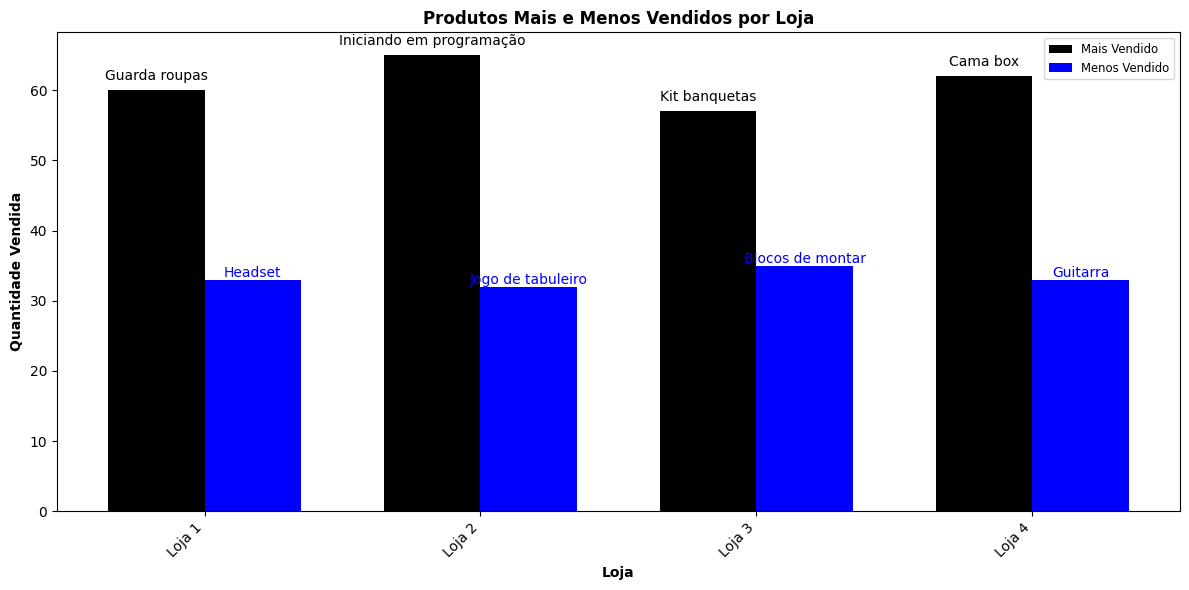

In [39]:
## Gráfico de produtos mais e menos vendidos
import matplotlib.pyplot as plt
import numpy as np

# Configurar o posicionamento das barras
x = np.arange(len(produto_mais_vendido_loja['Loja']))
largura_barra = 0.35  # Define a largura das barras

# Criar figura com tamanho adequado
plt.figure(figsize=(12, 6))

# Plotar barras lado a lado
plt.bar(x - largura_barra/2, produto_mais_vendido_loja['Quantidade Vendida'],
        width=largura_barra, color='black', label='Mais Vendido')
plt.bar(x + largura_barra/2, produto_menos_vendido_loja['Quantidade Vendida'],
        width=largura_barra, color='blue', label='Menos Vendido')

# Adicionar título e rótulos aos eixos
plt.title('Produtos Mais e Menos Vendidos por Loja', fontweight='bold')
plt.xlabel('Loja', fontweight='bold')
plt.ylabel('Quantidade Vendida', fontweight='bold')

# Configurar rótulos do eixo x
plt.xticks(x, produto_mais_vendido_loja['Loja'], rotation=45, ha='right')

# Adicionar nomes dos produtos acima das barras
for i, (loja, produto) in enumerate(zip(produto_mais_vendido_loja['Loja'],
                                      produto_mais_vendido_loja['Produto'])):
    plt.text(i - largura_barra/2, produto_mais_vendido_loja.iloc[i]['Quantidade Vendida'] + 1,
             produto, ha='center', va='bottom', fontsize=10, color='black')

for i, (loja, produto) in enumerate(zip(produto_menos_vendido_loja['Loja'],
                                      produto_menos_vendido_loja['Produto'])):
    plt.text(i + largura_barra/2, produto_menos_vendido_loja.iloc[i]['Quantidade Vendida'],
             produto, ha='center', va='bottom', fontsize=10, color='blue')

# Ajustar layout e exibir legenda
plt.tight_layout()
plt.legend(loc='upper right', fontsize = 'small')
plt.show()

# 5. Frete Médio por Loja







     Loja  Frete Médio
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


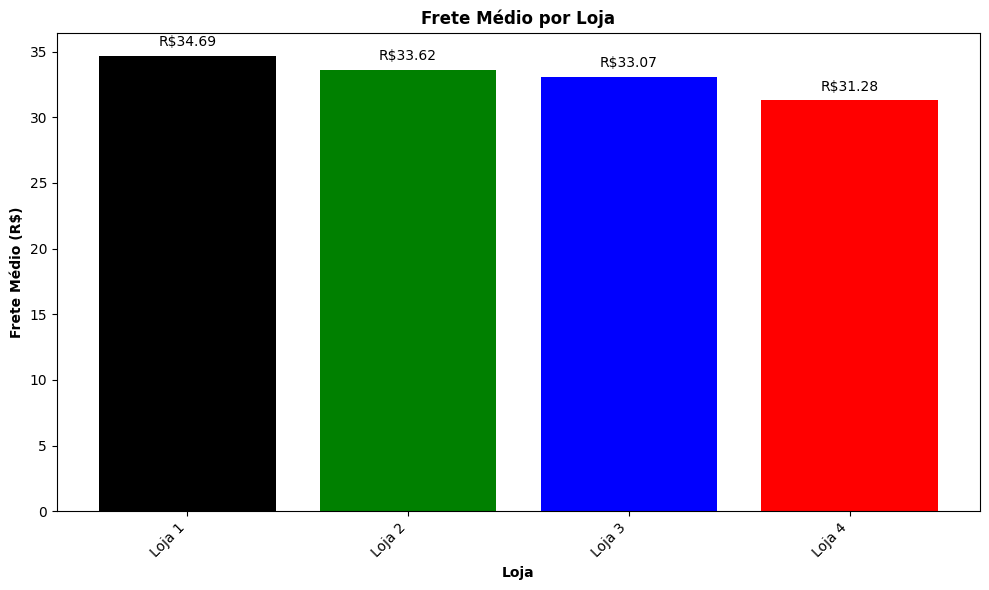

In [42]:

# Frete médio por loja
frete_medio_loja = todas_lojas.groupby('Loja')['Frete'].mean().reset_index(name='Frete Médio')
frete_medio_loja.columns = ['Loja', 'Frete Médio']
print(frete_medio_loja)

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(frete_medio_loja['Loja'], frete_medio_loja['Frete Médio'], color=['black', 'green', 'blue', 'red'])
plt.title('Frete Médio por Loja', fontweight='bold')
plt.xlabel('Loja', fontweight='bold')
plt.ylabel('Frete Médio (R$)', fontweight='bold')

plt.xticks(rotation=45, ha='right')

# Adicionando os valores acima das barras
for i, v in enumerate(frete_medio_loja['Frete Médio']):
  plt.text(i, v + 0.5, f'R${v:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Considerações Finais**

Com base nos dados apresentados, a loja 4 apresentou o menor faturamento entre as lojas de seu João, apesar de ter um valor baixo de frete.

A loja 4 tem a segunda pior avaliação dos clientes, o que demonstra uma insatifação dos clientes com relação a mesma.

Sendo assim, com base no desempenho da Loja 4, é a melhor opção de venda para o seu João.